In [1]:
%cd /content/drive/MyDrive/CNN_Visualization/cat_dog_data

/content/drive/MyDrive/CNN_Visualization/cat_dog_data


In [2]:
%ls 

links.gdoc  test/  test1.zip  train/  train.zip  Untitled0.ipynb


In [22]:
!mkdir train


In [24]:


!unzip "/content/drive/MyDrive/CNN_Visualization/cat_dog_data/train.zip" -d "/content/drive/MyDrive/CNN_Visualization/cat_dog_data/train/"
#!unzip "train.zip" -d "/train/"

Streaming output truncated to the last 5000 lines.
  inflating: /content/drive/MyDrive/CNN_Visualization/cat_dog_data/train/train/dog.5499.jpg  
  inflating: /content/drive/MyDrive/CNN_Visualization/cat_dog_data/train/train/dog.55.jpg  
  inflating: /content/drive/MyDrive/CNN_Visualization/cat_dog_data/train/train/dog.550.jpg  
  inflating: /content/drive/MyDrive/CNN_Visualization/cat_dog_data/train/train/dog.5500.jpg  
  inflating: /content/drive/MyDrive/CNN_Visualization/cat_dog_data/train/train/dog.5501.jpg  
  inflating: /content/drive/MyDrive/CNN_Visualization/cat_dog_data/train/train/dog.5502.jpg  
  inflating: /content/drive/MyDrive/CNN_Visualization/cat_dog_data/train/train/dog.5503.jpg  
  inflating: /content/drive/MyDrive/CNN_Visualization/cat_dog_data/train/train/dog.5504.jpg  
  inflating: /content/drive/MyDrive/CNN_Visualization/cat_dog_data/train/train/dog.5505.jpg  
  inflating: /content/drive/MyDrive/CNN_Visualization/cat_dog_data/train/train/dog.5506.jpg  
  inflating:

In [3]:
train_img_path= '/content/drive/MyDrive/CNN_Visualization/cat_dog_data/train/'
val_img_path = '/content/drive/MyDrive/CNN_Visualization/cat_dog_data/test'

In [6]:
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale = 1./255,validation_split=0.20)
test_datagen = ImageDataGenerator(rescale = 1./255)
  
train_generator = train_datagen.flow_from_directory(val_img_path, target_size =(150, 150), 
                                                      batch_size = 20, class_mode = "binary",subset='training')
  
validation_generator = train_datagen.flow_from_directory(val_img_path, target_size =(150, 150),
                                                      batch_size = 20, class_mode = "binary",subset='validation')

Found 10000 images belonging to 1 classes.
Found 2500 images belonging to 1 classes.


In [10]:
from keras import models
from keras import layers
  
model = models.Sequential()
  
model.add(layers.Conv2D(32, (3, 3), activation ='relu', input_shape =(150, 150,3)))
model.add(layers.MaxPooling2D((2, 2)))
  
model.add(layers.Conv2D(64, (3, 3), activation ='relu'))
model.add(layers.MaxPooling2D((2, 2)))
  
model.add(layers.Conv2D(128, (3, 3), activation ='relu'))
model.add(layers.MaxPooling2D((2, 2)))
  
model.add(layers.Conv2D(128, (3, 3), activation ='relu'))
model.add(layers.MaxPooling2D((2, 2)))
  
model.add(layers.Flatten())
  
model.add(layers.Dense(512, activation ='relu'))
model.add(layers.Dense(1, activation ="sigmoid"))
  
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 15, 15, 128)      

In [13]:
from tensorflow.keras import optimizers
  
model.compile(loss ="binary_crossentropy", optimizer = optimizers.Adam(lr = 1e-4),
metrics =['accuracy'])
  
history = model.fit_generator(train_generator, steps_per_epoch = train_generator.samples//train_generator.batch_size, epochs = 30,
validation_data = validation_generator, validation_steps = validation_generator.samples//validation_generator.batch_size)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")
/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/30
 49/100 [=============>................] - ETA: 3:49 - loss: 0.0374 - accuracy: 1.0000

KeyboardInterrupt: ignored

In [23]:
model.save_weights('cat_dog.h5')

(1, 150, 150, 3)


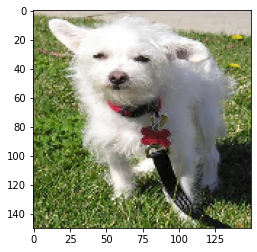

In [17]:
from keras.preprocessing import image
import numpy as np

image_path = '/content/drive/MyDrive/CNN_Visualization/cat_dog_data/train/train/dog.12499.jpg'

# Pre-processing the image
img = image.load_img(image_path, target_size = (150, 150))
img_tensor = image.img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis = 0)
img_tensor = img_tensor / 255.
  
# Print image tensor shape
print(img_tensor.shape)
  
# Print image
import matplotlib.pyplot as plt
plt.imshow(img_tensor[0])
plt.show()

Model: "model_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7_input (InputLayer)  [(None, 150, 150, 3)]     0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 17, 17, 128)       0  

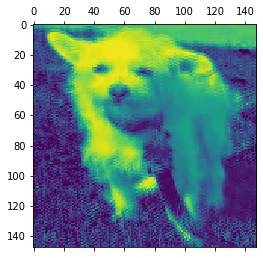

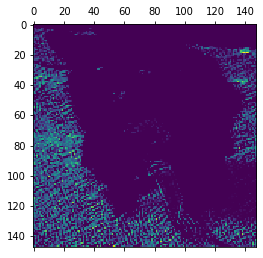

In [33]:
# Outputs of the 8 layers, which include conv2D and max pooling layers
layer_outputs = [layer.output for layer in model.layers[:8]]
activation_model = models.Model(inputs = model.input, outputs = layer_outputs)
activation_model.summary()
activations = activation_model.predict(img_tensor)
print(len(activations))
  
# Getting Activations of first layer
first_layer_activation = activations[0]
  
# shape of first layer activation
print(first_layer_activation.shape)
  
# 6th channel of the image after first layer of convolution is applied
plt.matshow(first_layer_activation[0, :, :, 6], cmap ='viridis')
  
# 15th channel of the image after first layer of convolution is applied
plt.matshow(first_layer_activation[0, :, :, 15], cmap ='viridis')

In [19]:
layer_names = []
  
for layer in model.layers[:8]:
  layer_names.append(layer.name)
print(layer_names)

['conv2d_7', 'max_pooling2d_5', 'conv2d_8', 'max_pooling2d_6', 'conv2d_9', 'max_pooling2d_7', 'conv2d_10', 'max_pooling2d_8']
